In [33]:
import sys
sys.path.append('../../')

import numpy as np

from helper import *

In [34]:
class minibatch_momentum:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x[0])
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # Sum values in rows of grad and divide by n
        grad_mean = np.sum(grad, axis=1) / self.batch_size

        return grad_mean
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=1000, eps=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling_and_moment(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [35]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_momentum(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_momentum(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=4000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
        
        # print(results[-1])
        if results[-1] > 500:
            break
    
    return results

In [36]:
def research_minibatch_view(results, start=None, end=None):
    if start is None:
        start = 1
    if end is None:
        end = len(results)

    # График n_epochs
    plt.plot(range(start, end+1), results[start-1:end], label='Minibatch GD momentum', antialiased=True, linewidth=2)
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

plt.style.use('default')
_ = plt.figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

In [37]:
results = research_minibatch_calculation(n_tests=10)

 30%|██▉       | 148/500 [00:02<00:06, 55.91it/s] 


In [38]:
print(results)

[286.6, 117.5, 77.0, 56.2, 45.3, 38.2, 34.6, 32.0, 28.7, 26.2, 24.4, 22.3, 22.2, 20.8, 19.4, 19.0, 18.5, 17.6, 16.9, 16.5, 16.0, 15.5, 14.9, 14.8, 14.6, 14.2, 13.6, 13.2, 13.0, 13.0, 12.9, 12.4, 12.3, 12.1, 12.0, 11.7, 11.5, 11.4, 11.2, 11.0, 10.9, 10.7, 10.6, 10.5, 10.3, 10.1, 10.0, 10.0, 10.0, 9.9, 9.9, 9.6, 9.4, 9.1, 9.4, 9.0, 9.1, 9.0, 9.0, 9.0, 8.9, 8.9, 8.8, 8.4, 8.6, 8.5, 8.2, 8.1, 8.1, 8.2, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.8, 7.8, 7.9, 7.9, 7.7, 7.6, 7.2, 7.1, 7.0, 7.1, 7.1, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.9, 7.0, 7.0, 7.0, 7.0, 6.9, 6.9, 6.9, 6.7, 6.8, 6.6, 6.4, 6.4, 6.6, 6.4, 6.1, 6.2, 6.1, 6.1, 6.1, 6.0, 6.0, 6.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 405.4, 6.0, 6.0, 6.0, 6.0, 405.4, 804.8]


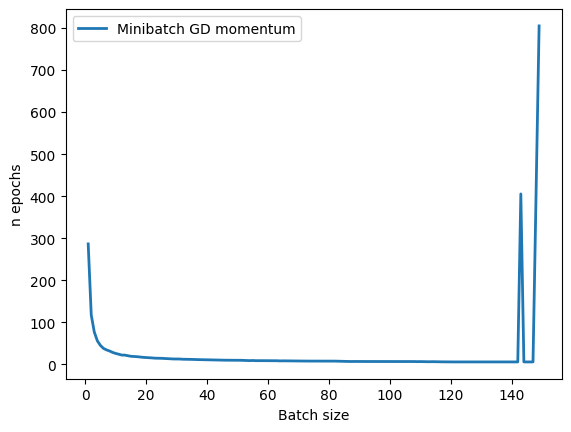

In [39]:
research_minibatch_view(results)

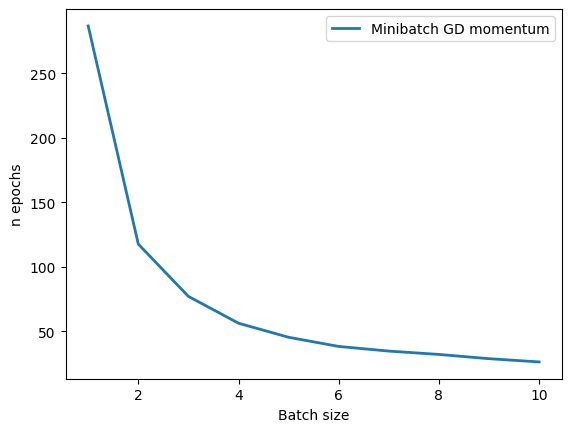

In [40]:
research_minibatch_view(results, 1, 10)